<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


C:\Users\anusaya aradwad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [========================

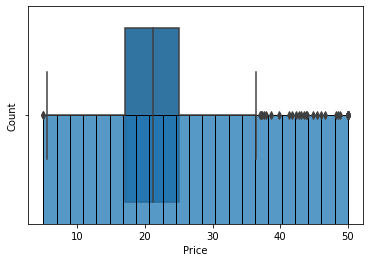

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("boston_housing.csv")

data.head()
data.columns
data.head(n=10)
data.shape
data.isnull().sum()
data.describe()
data.info()

import seaborn as sns
sns.histplot(data["Price"])
sns.boxplot(data["Price"])

from sklearn.preprocessing import StandardScaler
# Split the data into input and output variables
X = data.drop('Price', axis=1)
y =data['Price']
# Scale the input features 
scaler =StandardScaler()
X =scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
# Splitthe data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

# Display the model summary
print(model.summary())

# Compile the model
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])

x_val=X_train
y_val=y_train
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(X_test, y_test)
